In [19]:
from solartwins import *
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
import scipy.optimize as op

In [20]:
#BEFORE REMOVING BEST FIT TRENDS

In [21]:
x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t['Mg'],t['Mg_err']))

In [22]:
x1 = (0.0098289 , -0.03650514, -4.43399461) #two-dimensional optimization
som = scipy.optimize.minimize(twodnlnL, x1, args = (t['age'], t['Mg'], t['age_err'], t['Mg_err']))

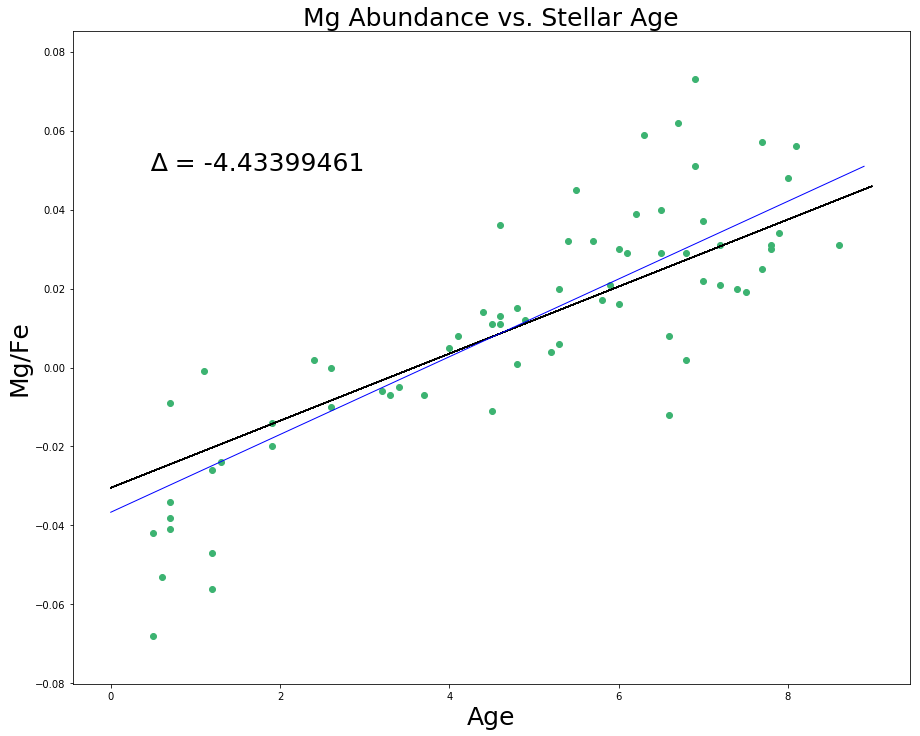

In [23]:
#plot of star age vs Mg abundance from above table - before removing temp trends

plt.scatter(t['age'], t['Mg'], c='mediumseagreen') 
plt.xlabel('Age',fontsize=25)
plt.ylabel('Mg/Fe', fontsize=25)
plt.title('Mg Abundance vs. Stellar Age', fontsize=25)

#line of best fit
mb = find_m_b(t['age'], t['Mg'], t['Mg_err'])
for i, txt in enumerate (t['Mg']):
    plot_xs = np.arange(0, 9, .01)
    plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=1)
    
#point labels
#for i, txt in enumerate(t['star_name']): 
        #plt.annotate(txt, xy=(t['age'][i], t['Mg'][i]), xytext=(-5,5), 
            #textcoords='offset points', ha='center', va='bottom')
        
mbtemp= restemp['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'blue', linewidth=1)
plt.text(3,.05,'∆ = -4.43399461',horizontalalignment='right', fontsize=25)
plt.savefig('mgvsage.png')

In [24]:
#AFTER REMOVING BEST FIT 

In [25]:
#abundance list without best fit age trends 
x = t['age']
y = t['Mg']
error = t['Mg_err']
mgabundances= residuals(x,y,error)

In [26]:
x0 = (0.00135163, -0.00619703, -0.0123545 ) #one-dimensional optimization
res = scipy.optimize.minimize(nlnL, x0, args = (t['age'], mgabundances, error))

In [27]:
x0 = (1.34583908e-03, -6.16597257e-03, -4.39456377e+00) #two-dimensional optimization
restem = scipy.optimize.minimize(twodnlnL, x0, args = (t['age'], mgabundances, t['age_err'], t['Mg_err']))

2.0942737962993942e-18 -2.7310906426203895e-17


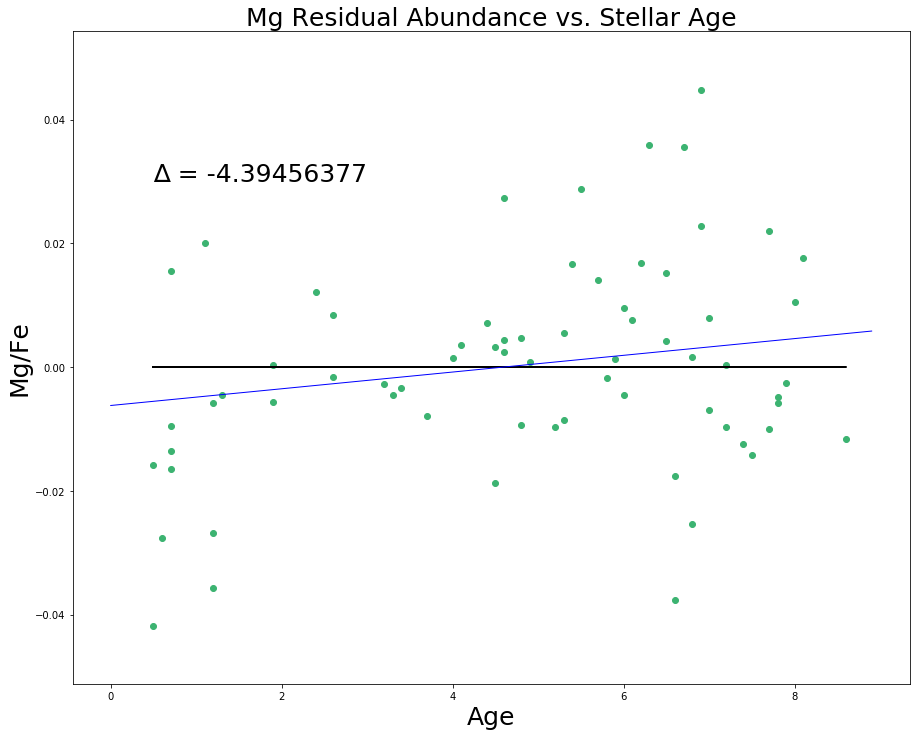

In [28]:
#plot of age and abundance 
plt.scatter(t['age'], mgabundances, c='mediumseagreen') 
plt.xlabel('Age',fontsize=25)
plt.ylabel('Mg/Fe', fontsize=25)
plt.title('Mg Residual Abundance vs. Stellar Age', fontsize=25)

fmb = find_m_b(t['age'], mgabundances, t['Mg_err'])
m = fmb[0]
b = fmb[1]

plt.plot(t['age'], m * t['age'] + b, color='black') 
        
mb= res['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'blue', linewidth=1)
plt.text(3,.03,'∆ = -4.39456377',horizontalalignment='right', fontsize=25)
plt.savefig('mgvsagenobf.png')
print(m,b)

In [29]:
#REMOVING TEMPERATURE TRENDS

In [30]:
mg_con_temp = []
for ob in t['star_name']:
    abund = np.array(star_table(ob)['Abundance'])
    con_temp = np.array(star_table(ob)['Condensation Temp'])
    error = np.array(star_table(ob)['Abundance Error'])
    residu = residuals(con_temp, abund, error)
    mg_con_temp.append(residu[3])
    
mgabund = np.array(t['Mg'])
mg_temp = mgabund - mg_con_temp

In [31]:
x0 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
reso = scipy.optimize.minimize(nlnL, x0, args = (t['age'], mg_temp, t['Mg_err']))

In [32]:
x0 = (1.34583908e-03, -6.16597257e-03, -4.39456377e+00) #two-dimensional optimization
resotemp = scipy.optimize.minimize(twodnlnL, x0, args = (t['age'], mg_temp, t['age_err'], t['Mg_err']))

-0.0005898432824068406 0.00808498957437298


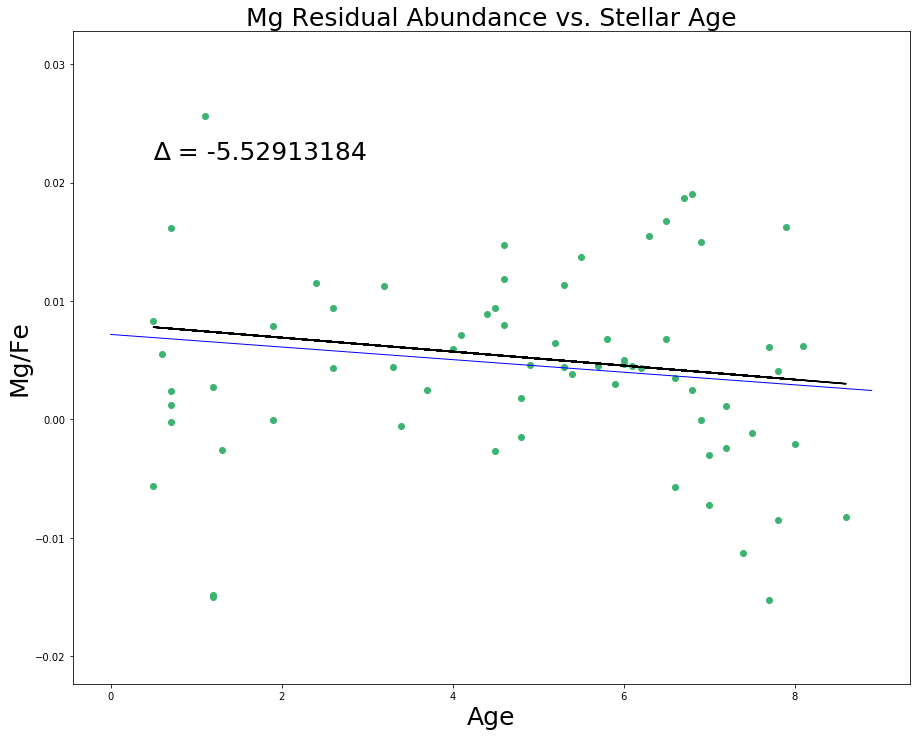

In [33]:
plt.scatter(t['age'], mg_temp, c='mediumseagreen') 
plt.xlabel('Age',fontsize=25)
plt.ylabel('Mg/Fe', fontsize=25)
plt.title('Mg Residual Abundance vs. Stellar Age', fontsize=25)

fmb = find_m_b(t['age'], mg_temp, t['Mg_err'])
m = fmb[0]
b = fmb[1]

plt.plot(t['age'], m * t['age'] + b, color='black') 

mb= reso['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'blue', linewidth=1)
plt.text(3,.022,'∆ = -5.52913184',horizontalalignment='right', fontsize=25)
plt.savefig('mgvsageresid.png')
print(m,b)

In [34]:
initial_guess = (0.1, 0.1)

standarddevmg = stdev(t['Mg'])
sd_temp = stdev(mg_temp)
stdev_resid = stdev(mgabundances)

In [35]:
print(standarddevmg)
print(stdev_resid)
print(sd_temp)

0.02996596613322483
0.016754876051260633
0.008177866795790485


In [36]:
mb= restemp['x']
mb2d = som['x']
linalgmb = [find_m_b(t['age'], t['Mg'], t['Mg_err'])[0], find_m_b(t['age'], t['Mg'], t['Mg_err'])[1], 'nan']
bedellmg = [0.0099, -0.0367, 'nan']
categor = ['Slope', 'Intercept' , 'Delta']
Table([categor, mb, mb2d, bedellmg, linalgmb], names=('Type','Best Fit', '2D Best Fit','Bedell Best Fit',
                                                      'Linear Best Fit'))

Type,Best Fit,2D Best Fit,Bedell Best Fit,Linear Best Fit
str9,float64,float64,str32,str32
Slope,0.009844963674763165,0.0098289,0.0099,0.00849333736942717
Intercept,-0.03665831937917271,-0.03650514,-0.0367,-0.03046130125927851
Delta,-0.01235449014594603,-4.43399461,nan,nan
